In [1]:
import numpy as np
import xarray as xr
import os.path as op
from xmitgcm import open_mdsdataset
import xgcm.grid as xgd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ddir = '/swot/SUM05/takaya/MITgcm/channel/runs/'

To see whether the tracers have reached numerical convergence, it is useful to check how 

$$\frac{d}{dt} \int_V c\ dV$$

changes interannually.

In [3]:
ds = open_mdsdataset(op.join(ddir,'res10km_2804_nutrientoutputs/'), grid_dir=ddir,
                     iters=range(1036944,1296144,144),
                     prefix=['FeT_tave','NO3_tave','PO4_tave','SiO2_tave'], 
                     delta_t=6e2
                    )
ds

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 100, XG: 100, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
  * XC        (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * YC        (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * XG        (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * YG        (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA        (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dxG       (YG, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dyG       (YC, XG) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth     (YC

In [4]:
nys,nyn = (50,150)
ds = ds.isel(YC=slice(nys,None), YG=slice(nys,None))
ds

<xarray.Dataset>
Dimensions:   (XC: 100, XG: 100, YC: 150, YG: 150, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
  * XC        (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * YC        (YC) >f4 505000.0 515000.0 525000.0 535000.0 545000.0 555000.0 ...
  * XG        (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * YG        (YG) >f4 500000.0 510000.0 520000.0 530000.0 540000.0 550000.0 ...
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA        (YC, XC) >f4 dask.array<shape=(150, 100), chunksize=(150, 100)>
    dxG       (YG, XC) >f4 dask.array<shape=(150, 100), chunksize=(150, 100)>
    dyG       (YC, XG) >f4 dask.array<shape=(150, 100), chunksize=(150, 100)>
    Dept

In [5]:
grid = xgd.Grid(ds, periodic=['x'])
grid

<xgcm.Grid>
Z Axis (not periodic):
  * center   Z (40) --> left
  * left     Zl (40) --> center
  * outer    Zp1 (41) --> center
  * right    Zu (40) --> center
X Axis (not periodic):
  * center   XC (100) --> left
  * left     XG (100) --> center
Y Axis (not periodic):
  * center   YC (150) --> left
  * left     YG (150) --> center
T Axis (not periodic):
  * center   time (1800)

In [6]:
fe = ds.TRAC03
po4 = ds.TRAC01
no3 = ds.TRAC02
sio2 = ds.TRAC04

fe

<xarray.DataArray 'TRAC03' (time: 1800, Z: 40, YC: 150, XC: 100)>
dask.array<shape=(1800, 40, 150, 100), dtype=float32, chunksize=(1, 40, 150, 100)>
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 505000.0 515000.0 525000.0 535000.0 545000.0 555000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(150, 100), chunksize=(150, 100)>
    Depth    (YC, XC) >f4 dask.array<shape=(150, 100), chunksize=(150, 100)>
    drF      (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    PHrefC   (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    hFacC    (Z, YC, XC) >f4 dask.array<shape=(40, 150, 100), chunksize=(40, 150, 100)>
    iter     (time) int64 dask.array<shape=(1800,), chunksize=(1,)>
  * time     (time) float64 6.222e+08 6.223e+08 6.223e+08 6.224e+08 ...
Attributes:
    standard_name:  TRAC03
    long_name:      FeT concentration
    units:    

In [14]:
sind = 24*36e2
siny = 360*sind
fe_conc = xr.DataArray(grid.cumsum(grid.cumsum(grid.cumsum(fe*fe.hFacC*ds.rA
                                                           *ds.drC[1:].data[np.newaxis,:,np.newaxis,np.newaxis], 
                                                          'X', **{'boundary':'fill'})[:,:,:,-1],
                                              'Y', **{'boundary':'fill'})[:,:,-1],
                                  'Z', **{'boundary':'fill'}
                                  ).data.reshape(5,360,40),
                       dims=['iYEAR','time','Z'],
                       coords={'iYEAR':range(5),'time':range(int(sind),int(siny+sind),int(sind)),'Z':fe.Z.data}
                      )
fe_conc

<xarray.DataArray 'reshape-e894618de4fe9ed9e4bd8c46dcea65fb' (iYEAR: 5, time: 360, Z: 40)>
dask.array<shape=(5, 360, 40), dtype=float64, chunksize=(1, 360, 1)>
Coordinates:
  * iYEAR    (iYEAR) int64 0 1 2 3 4
  * time     (time) int64 86400 172800 259200 345600 432000 518400 604800 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...

In [19]:
dfe_concdt = xr.DataArray((fe_conc.diff('time',n=1)/fe_conc.time.diff('time',n=1)).data,
                         dims=['iYEAR','iDAY','Z'],
                         coords={'iYEAR':range(5),'iDAY':np.arange(.5,359.5,1),'Z':fe_conc.Z.data})
dfe_concdt

<xarray.DataArray 'truediv-fe2d5773a983eddd8d5bd228a847a2f1' (iYEAR: 5, iDAY: 359, Z: 40)>
dask.array<shape=(5, 359, 40), dtype=float64, chunksize=(1, 359, 1)>
Coordinates:
  * iYEAR    (iYEAR) int64 0 1 2 3 4
  * iDAY     (iDAY) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...

In [20]:
dfe_concdt.Z

<xarray.DataArray 'Z' (Z: 40)>
array([   -5. ,   -15. ,   -25. ,   -36. ,   -49. ,   -64. ,   -81.5,  -102. ,
        -126. ,  -154. ,  -187. ,  -226. ,  -272. ,  -327. ,  -393. ,  -471.5,
        -565. ,  -667.5,  -770.5,  -873.5,  -976.5, -1079.5, -1182.5, -1285.5,
       -1388.5, -1491.5, -1594.5, -1697.5, -1800.5, -1903.5, -2006.5, -2109.5,
       -2212.5, -2315.5, -2418.5, -2521.5, -2624.5, -2727.5, -2830.5, -2933.5],
      dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...

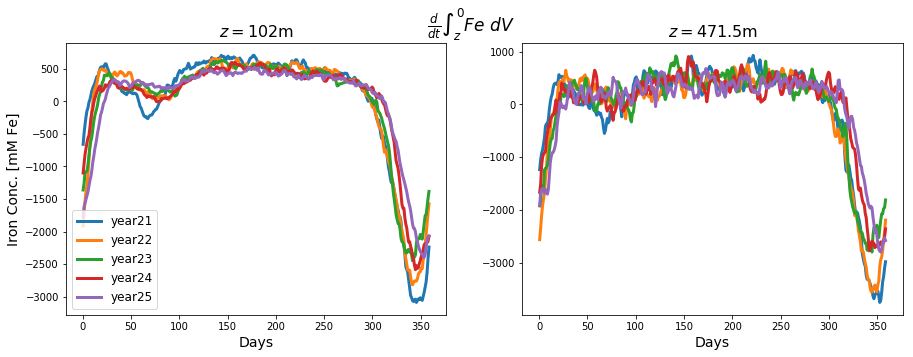

In [37]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
for i in range(5):
    ax1.plot(dfe_concdt.iDAY, dfe_concdt[i,:,7], lw=3, label=r'year%02d' % (i+21))
    ax2.plot(dfe_concdt.iDAY, dfe_concdt[i,:,15], lw=3)
ax1.legend(loc='lower left', fontsize=12)
ax1.set_title(r'$z=$102m', fontsize=16)
ax2.set_title(r'$z=$471.5m', fontsize=16)
ax1.set_ylabel(r'Iron Conc. [mM Fe]', fontsize=14)
ax1.set_xlabel(r'Days', fontsize=14)
ax2.set_xlabel(r'Days', fontsize=14)
plt.suptitle(r'$\frac{d}{dt} \int^0_z Fe\ dV$', fontsize=17)
plt.savefig(op.join(ddir, 'Tendency-IronConcentration_3D2804.pdf'))

In [32]:
po4_conc = xr.DataArray(grid.cumsum(grid.cumsum(grid.cumsum(po4*po4.hFacC*ds.rA
                                                           *ds.drC[1:].data[np.newaxis,:,np.newaxis,np.newaxis], 
                                                          'X', **{'boundary':'fill'})[:,:,:,-1],
                                              'Y', **{'boundary':'fill'})[:,:,-1],
                                  'Z', **{'boundary':'fill'}
                                  ).data.reshape(5,360,40),
                       dims=['iYEAR','time','Z'],
                       coords={'iYEAR':range(5),'time':range(int(sind),int(siny+sind),int(sind)),'Z':po4.Z.data}
                      )
po4_conc

<xarray.DataArray 'reshape-b0bfcbe85d45001d07f1d15d535f2217' (iYEAR: 5, time: 360, Z: 40)>
dask.array<shape=(5, 360, 40), dtype=float64, chunksize=(1, 360, 1)>
Coordinates:
  * iYEAR    (iYEAR) int64 0 1 2 3 4
  * time     (time) int64 86400 172800 259200 345600 432000 518400 604800 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...

In [33]:
dpo4_concdt = xr.DataArray((po4_conc.diff('time',n=1)/po4_conc.time.diff('time',n=1)).data,
                          dims=['iYEAR','iDAY','Z'],
                          coords={'iYEAR':range(5),'iDAY':np.arange(.5,359.5,1),'Z':po4_conc.Z.data})
dpo4_concdt

<xarray.DataArray 'truediv-2b098bd44632a9964b3bf26b72116e4a' (iYEAR: 5, iDAY: 359, Z: 40)>
dask.array<shape=(5, 359, 40), dtype=float64, chunksize=(1, 359, 1)>
Coordinates:
  * iYEAR    (iYEAR) int64 0 1 2 3 4
  * iDAY     (iDAY) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...

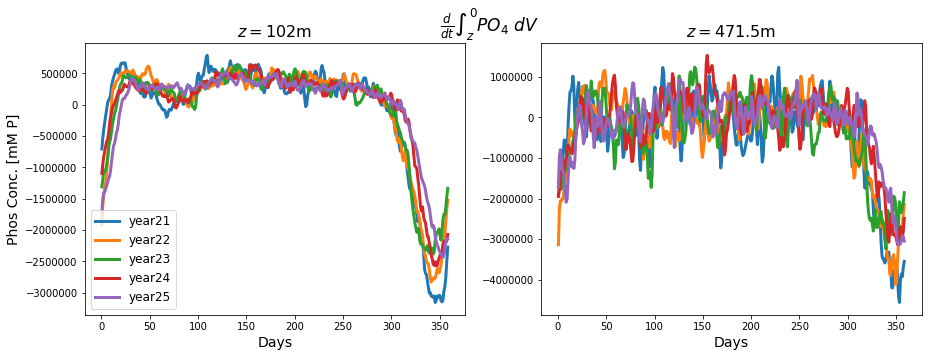

In [36]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
for i in range(5):
    ax1.plot(dpo4_concdt.iDAY, dpo4_concdt[i,:,7], lw=3, label=r'year%02d' % (i+21))
    ax2.plot(dpo4_concdt.iDAY, dpo4_concdt[i,:,15], lw=3)
ax1.legend(loc='lower left', fontsize=12)
ax1.set_title(r'$z=$102m', fontsize=16)
ax2.set_title(r'$z=$471.5m', fontsize=16)
ax1.set_ylabel(r'Phos Conc. [mM P]', fontsize=14)
ax1.set_xlabel(r'Days', fontsize=14)
ax2.set_xlabel(r'Days', fontsize=14)
plt.suptitle(r'$\frac{d}{dt} \int^0_z PO_4\ dV$', fontsize=17)
plt.savefig(op.join(ddir, 'Tendency-PhosConcentration_3D2804.pdf'))

In [38]:
no3_conc = xr.DataArray(grid.cumsum(grid.cumsum(grid.cumsum(no3*no3.hFacC*ds.rA
                                                           *ds.drC[1:].data[np.newaxis,:,np.newaxis,np.newaxis], 
                                                          'X', **{'boundary':'fill'})[:,:,:,-1],
                                              'Y', **{'boundary':'fill'})[:,:,-1],
                                  'Z', **{'boundary':'fill'}
                                  ).data.reshape(5,360,40),
                       dims=['iYEAR','time','Z'],
                       coords={'iYEAR':range(5),'time':range(int(sind),int(siny+sind),int(sind)),'Z':no3.Z.data}
                      )
no3_conc

<xarray.DataArray 'reshape-2e320338dc6004c56f6e42dc0ac86fe6' (iYEAR: 5, time: 360, Z: 40)>
dask.array<shape=(5, 360, 40), dtype=float64, chunksize=(1, 360, 1)>
Coordinates:
  * iYEAR    (iYEAR) int64 0 1 2 3 4
  * time     (time) int64 86400 172800 259200 345600 432000 518400 604800 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...

In [43]:
dno3_concdt = xr.DataArray((no3_conc.diff('time',n=1)/no3_conc.time.diff('time',n=1)).data,
                          dims=['iYEAR','iDAY','Z'],
                          coords={'iYEAR':range(5),'iDAY':np.arange(.5,359.5,1),'Z':no3_conc.Z.data})
dno3_concdt

<xarray.DataArray 'truediv-e57901b6971e3c237e69a4e0d6103e71' (iYEAR: 5, iDAY: 359, Z: 40)>
dask.array<shape=(5, 359, 40), dtype=float64, chunksize=(1, 359, 1)>
Coordinates:
  * iYEAR    (iYEAR) int64 0 1 2 3 4
  * iDAY     (iDAY) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...

In [40]:
sio2_conc = xr.DataArray(grid.cumsum(grid.cumsum(grid.cumsum(sio2*sio2.hFacC*ds.rA
                                                           *ds.drC[1:].data[np.newaxis,:,np.newaxis,np.newaxis], 
                                                          'X', **{'boundary':'fill'})[:,:,:,-1],
                                              'Y', **{'boundary':'fill'})[:,:,-1],
                                  'Z', **{'boundary':'fill'}
                                  ).data.reshape(5,360,40),
                       dims=['iYEAR','time','Z'],
                       coords={'iYEAR':range(5),'time':range(int(sind),int(siny+sind),int(sind)),'Z':sio2.Z.data}
                      )
sio2_conc

<xarray.DataArray 'reshape-4ca1b7d8f3bc0c3caf18935655c7756d' (iYEAR: 5, time: 360, Z: 40)>
dask.array<shape=(5, 360, 40), dtype=float64, chunksize=(1, 360, 1)>
Coordinates:
  * iYEAR    (iYEAR) int64 0 1 2 3 4
  * time     (time) int64 86400 172800 259200 345600 432000 518400 604800 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...

In [41]:
dsio2_concdt = xr.DataArray((sio2_conc.diff('time',n=1)/sio2_conc.time.diff('time',n=1)).data,
                          dims=['iYEAR','iDAY','Z'],
                          coords={'iYEAR':range(5),'iDAY':np.arange(.5,359.5,1),'Z':sio2_conc.Z.data})
dsio2_concdt

<xarray.DataArray 'truediv-6d945d6dfcd06517501842a8db1539a0' (iYEAR: 5, iDAY: 359, Z: 40)>
dask.array<shape=(5, 359, 40), dtype=float64, chunksize=(1, 359, 1)>
Coordinates:
  * iYEAR    (iYEAR) int64 0 1 2 3 4
  * iDAY     (iDAY) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...

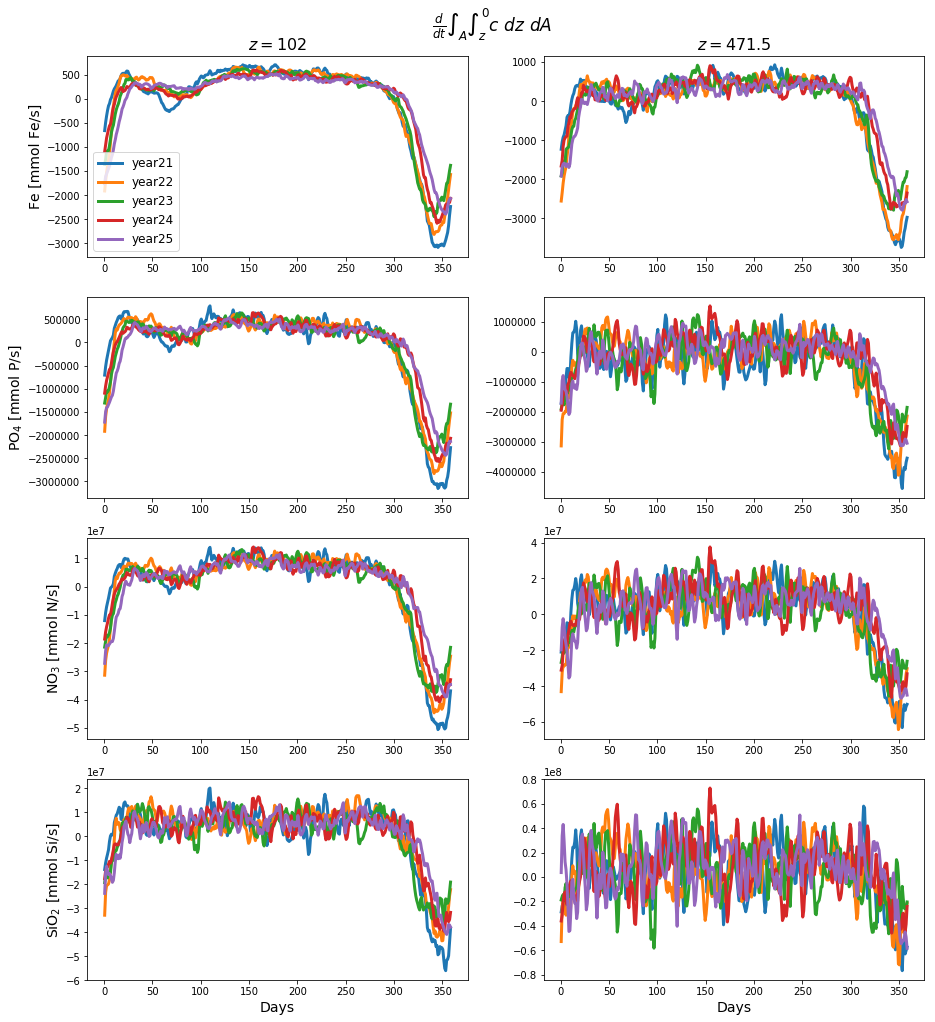

In [55]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(15,17))
for i in range(5):
    axes[0,0].plot(dfe_concdt.iDAY, dfe_concdt[i,:,7], lw=3, label=r'year%02d' % (i+21))
    axes[0,1].plot(dfe_concdt.iDAY, dfe_concdt[i,:,15], lw=3)
    axes[1,0].plot(dpo4_concdt.iDAY, dpo4_concdt[i,:,7], lw=3)
    axes[1,1].plot(dpo4_concdt.iDAY, dpo4_concdt[i,:,15], lw=3)
    axes[2,0].plot(dno3_concdt.iDAY, dno3_concdt[i,:,7], lw=3)
    axes[2,1].plot(dno3_concdt.iDAY, dno3_concdt[i,:,15], lw=3)
    axes[3,0].plot(dsio2_concdt.iDAY, dsio2_concdt[i,:,7], lw=3)
    axes[3,1].plot(dsio2_concdt.iDAY, dsio2_concdt[i,:,15], lw=3)
axes[0,0].legend(loc='lower left', fontsize=12)
axes[0,0].set_title(r'$z=$102', fontsize=16)
axes[0,1].set_title(r'$z=$471.5', fontsize=16)
axes[0,0].set_ylabel(r'Fe [mmol Fe/s]', fontsize=14)
axes[1,0].set_ylabel(r'PO$_4$ [mmol P/s]', fontsize=14)
axes[2,0].set_ylabel(r'NO$_3$ [mmol N/s]', fontsize=14)
axes[3,0].set_ylabel(r'SiO$_2$ [mmol Si/s]', fontsize=14)
axes[3,0].set_xlabel(r'Days', fontsize=14)
axes[3,1].set_xlabel(r'Days', fontsize=14)
plt.suptitle(r'$\frac{d}{dt} \int_A \int^0_z c\ dz\ dA$', fontsize=17, y=.92)
plt.savefig(op.join(ddir, 'Tendency-NutrientConcentration_3D2804.pdf'))